# Importing Necessary Libraries and Unseen Dataset for saved model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("termdeposit_test.csv")
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [3]:
# Drop any irrelevant columns
df1 = df1.drop(['ID'], axis=1)
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


# Checking outliers

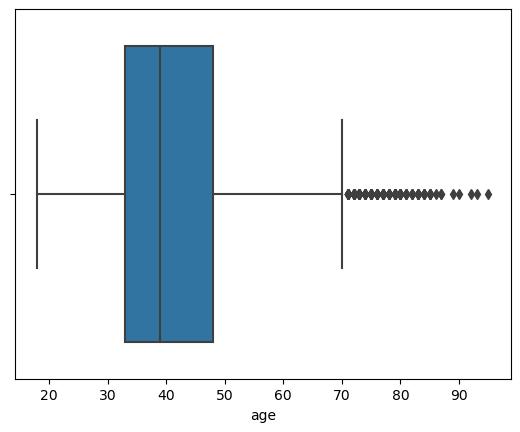

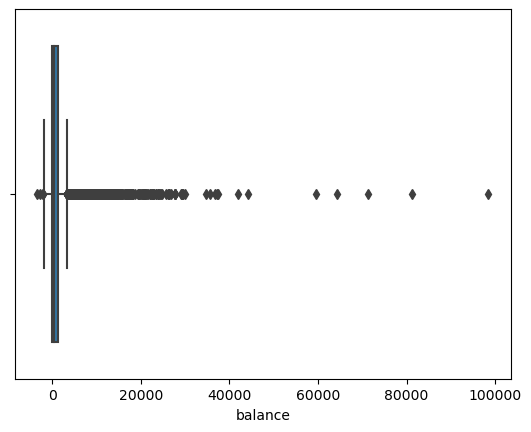

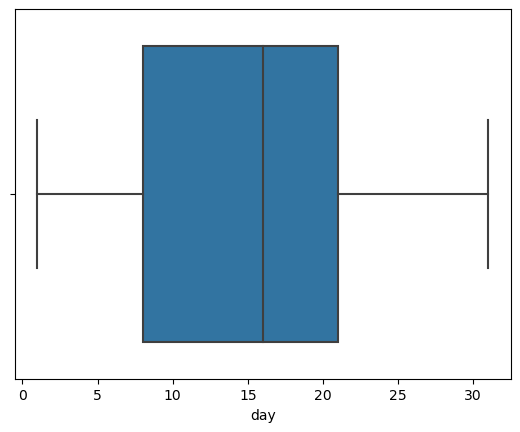

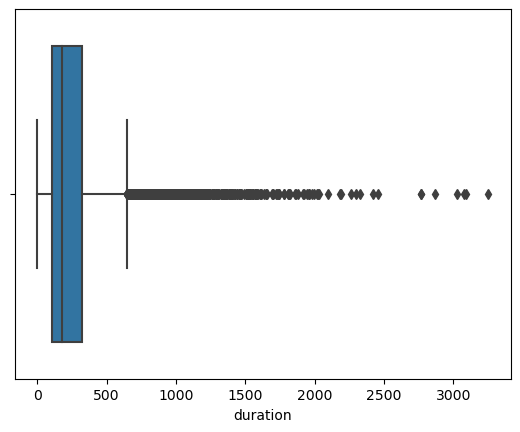

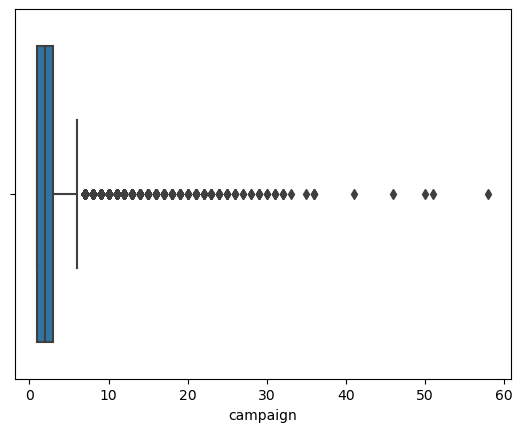

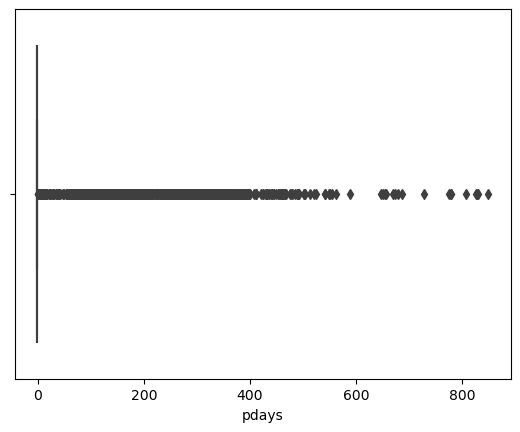

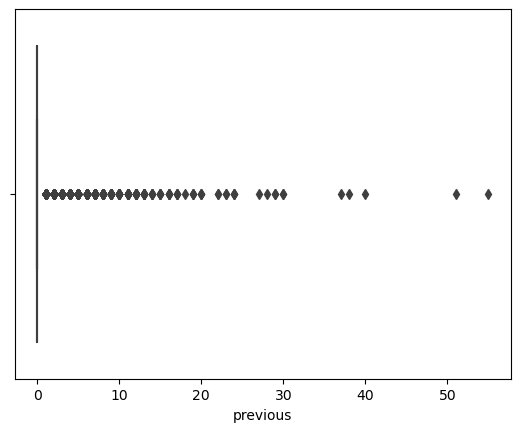

In [4]:
# Lets check the outliers

numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for column in numerical_columns:
    sns.boxplot(x=df1[column])
    plt.show()

In [5]:
from scipy.stats.mstats import winsorize

# Winsorize all numerical columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
df1[num_cols] = df1[num_cols].apply(lambda x: winsorize(x, limits=[0.05, 0.05]), axis=0)

# Clip extreme values
clip_values = df1[num_cols].quantile([0.01, 0.99])
df1[num_cols] = df1[num_cols].clip(lower=clip_values.loc[0.01], upper=clip_values.loc[0.99], axis=1)

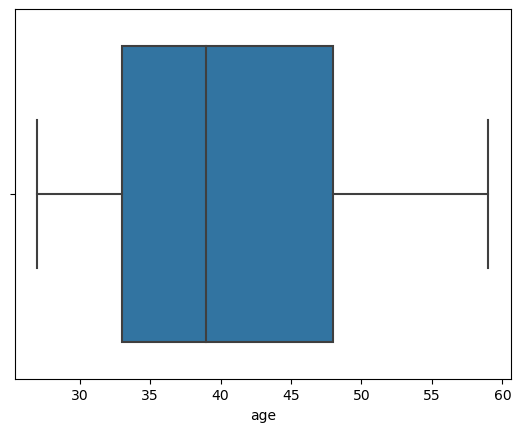

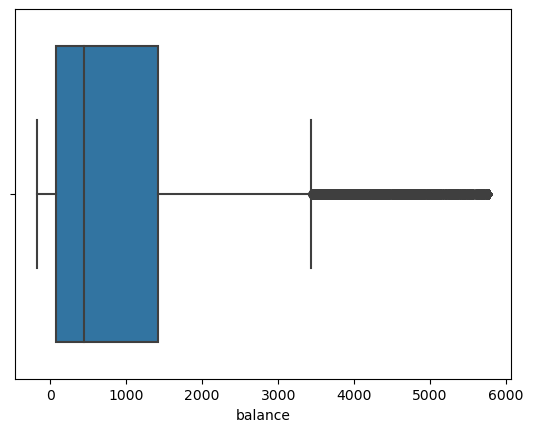

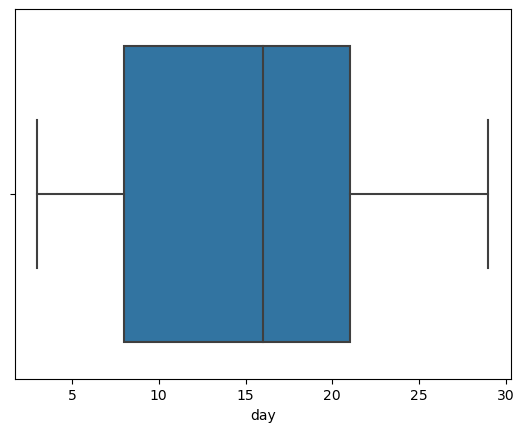

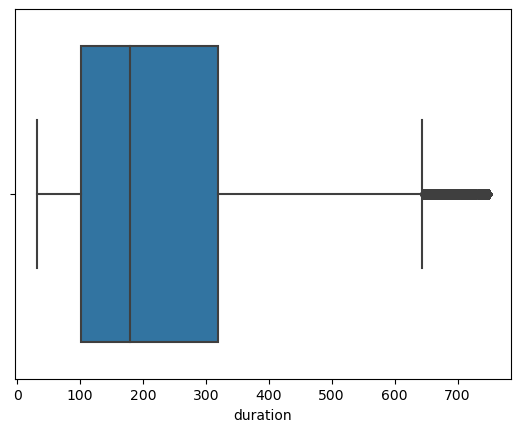

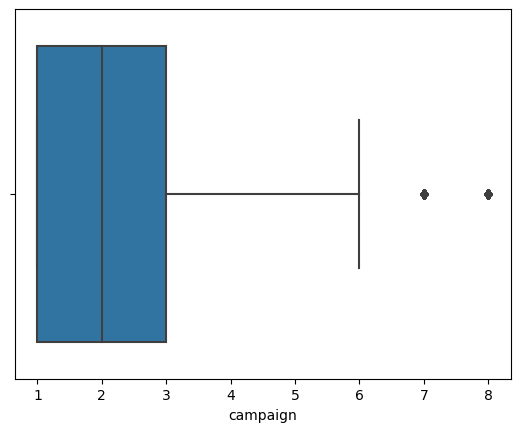

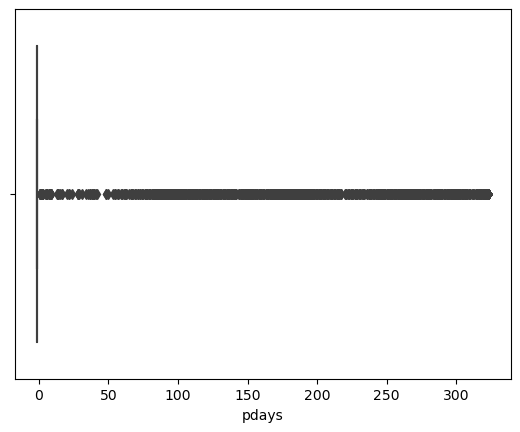

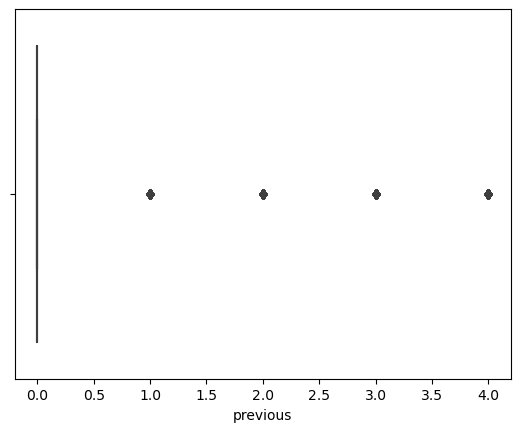

In [6]:
# Lets check the outliers

numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for column in numerical_columns:
    sns.boxplot(x=df1[column])
    plt.show()

In [7]:
df1.shape

(13564, 16)

In [8]:
# Count the number of observations in the original dataset
original_size = len(df1)

# Count the number of observations in the treated dataset
treated_size = len(df1)

# Calculate the data loss percentage
data_loss_percent = ((original_size - treated_size) / original_size) * 100
print(f"Data loss percentage: {data_loss_percent:.2f}%")

Data loss percentage: 0.00%


In [9]:
df1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Checking Skewness

In [10]:
df1.skew()

age         0.401495
balance     1.793050
day         0.096549
duration    1.284502
campaign    1.545415
pdays       2.187617
previous    2.447205
dtype: float64

In [11]:
from sklearn.preprocessing import PowerTransformer

# Define columns to transform
columns = ['balance', 'duration', 'campaign', 'pdays', 'previous']

# Apply Yeo-Johnson transformation to selected columns
pt = PowerTransformer(method='yeo-johnson')
df1[columns] = pt.fit_transform(df1[columns])

# Round transformed values to 2 decimal places
df1[columns] = df1[columns].round(2)

In [12]:
df1.skew()

age         0.401495
balance     0.508733
day         0.096549
duration   -0.015505
campaign    0.201283
pdays       1.609606
previous    1.609264
dtype: float64

In [13]:
# Apply log transformation to pdays and previous columns
df1['pdays'] = np.log(df1['pdays'] + 1)
df1['previous'] = np.log(df1['previous'] + 1)
df1.skew()

age         0.401495
balance     0.508733
day         0.096549
duration   -0.015505
campaign    0.201283
pdays       1.607873
previous    1.607662
dtype: float64

In [14]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to 'pdays' and 'previous' columns
df1['pdays'], _ = boxcox(df1['pdays']+1)
df1['previous'], _ = boxcox(df1['previous']+1)
df1.skew()

age         0.401495
balance     0.508733
day         0.096549
duration   -0.015505
campaign    0.201283
pdays       1.607206
previous    1.607206
dtype: float64

# Encoding Categorical Column

In [15]:
df1.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

# Get all categorical columns
cat_columns = df1.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in cat_columns:
    df1[col] = le.fit_transform(df1[col])

In [17]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,-0.50,1,0,0,15,8,-1.95,1.54,-6.938529,-6.938920,3
1,59,5,0,0,0,1.11,0,0,1,3,5,0.90,-1.11,-6.938529,-6.938920,3
2,31,6,2,2,0,-0.47,1,0,2,16,8,1.71,-1.11,-6.938529,-6.938920,3
3,57,7,2,0,0,1.57,1,0,1,13,8,-1.20,0.13,-6.938529,-6.938920,3
4,45,1,0,1,0,-2.20,0,1,2,3,5,-0.59,-1.11,-6.938529,-6.938920,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,-0.58,0,0,0,28,1,-0.25,1.12,-6.938529,-6.938920,3
13560,54,1,1,0,0,0.86,1,0,2,20,6,-0.18,-1.11,-6.938529,-6.938920,3
13561,35,5,1,0,0,-0.34,1,0,0,29,4,-0.35,-1.11,-6.938529,-6.938920,3
13562,29,0,2,1,0,-0.20,0,0,0,9,9,0.16,0.13,0.308550,0.309763,2


In [18]:
df1.dtypes

age            int64
job            int64
marital        int64
education      int64
default        int64
balance      float64
housing        int64
loan           int64
contact        int64
day            int64
month          int64
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome       int64
dtype: object

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        13564 non-null  int64  
 1   job        13564 non-null  int64  
 2   marital    13564 non-null  int64  
 3   education  13564 non-null  int64  
 4   default    13564 non-null  int64  
 5   balance    13564 non-null  float64
 6   housing    13564 non-null  int64  
 7   loan       13564 non-null  int64  
 8   contact    13564 non-null  int64  
 9   day        13564 non-null  int64  
 10  month      13564 non-null  int64  
 11  duration   13564 non-null  float64
 12  campaign   13564 non-null  float64
 13  pdays      13564 non-null  float64
 14  previous   13564 non-null  float64
 15  poutcome   13564 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 1.7 MB


In [20]:
df1.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.00000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,40.721247,4.355721,1.168903,1.224344,0.016957,0.000050,0.556326,0.15578,0.629976,15.719994,5.499410,0.000086,0.000358,-5.584567,-5.584885,2.545562
std,9.676661,3.274561,0.610680,0.745224,0.129114,0.999642,0.496836,0.36266,0.894322,8.109325,3.013095,1.000238,1.001352,2.824925,2.825077,1.005069
min,27.000000,0.000000,0.000000,0.000000,0.000000,-2.200000,0.000000,0.00000,0.000000,3.000000,0.000000,-1.950000,-1.110000,-6.938529,-6.938920,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,-0.550000,0.000000,0.00000,0.000000,8.000000,3.000000,-0.690000,-1.110000,-6.938529,-6.938920,3.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,-0.220000,1.000000,0.00000,0.000000,16.000000,6.000000,-0.020000,0.130000,-6.938529,-6.938920,3.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,0.400000,1.000000,0.00000,2.000000,21.000000,8.000000,0.700000,0.750000,-6.938529,-6.938920,3.000000
max,59.000000,11.000000,2.000000,3.000000,1.000000,2.410000,1.000000,1.00000,2.000000,29.000000,11.000000,1.850000,1.780000,0.309429,0.309763,3.000000


# Feature Scaling

In [22]:
from sklearn.preprocessing import RobustScaler

# Define the scaler
scaler = RobustScaler()

# Scale numeric features for unseen data
scaled_df1 = scaler.fit_transform(df1)

In [23]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,-0.50,1,0,0,15,8,-1.95,1.54,-6.938529,-6.938920,3
1,59,5,0,0,0,1.11,0,0,1,3,5,0.90,-1.11,-6.938529,-6.938920,3
2,31,6,2,2,0,-0.47,1,0,2,16,8,1.71,-1.11,-6.938529,-6.938920,3
3,57,7,2,0,0,1.57,1,0,1,13,8,-1.20,0.13,-6.938529,-6.938920,3
4,45,1,0,1,0,-2.20,0,1,2,3,5,-0.59,-1.11,-6.938529,-6.938920,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,-0.58,0,0,0,28,1,-0.25,1.12,-6.938529,-6.938920,3
13560,54,1,1,0,0,0.86,1,0,2,20,6,-0.18,-1.11,-6.938529,-6.938920,3
13561,35,5,1,0,0,-0.34,1,0,0,29,4,-0.35,-1.11,-6.938529,-6.938920,3
13562,29,0,2,1,0,-0.20,0,0,0,9,9,0.16,0.13,0.308550,0.309763,2


In [24]:
import pickle

# Load Saved model
with open('Bank_prediction.pickle', 'rb') as f:
    model = pickle.load(f)


In [25]:
# Make predictions
predictions = model.predict(df1)

# Print predictions
print(predictions)

[0 0 0 ... 0 0 0]
